In [54]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
titanic = pd.read_csv('titatnic_train.csv')
titanic.drop(columns={'PassengerId','Name','Ticket','Cabin'}, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
titanic.head()

titanic['Pclass'] = titanic['Pclass'].astype('object')
titanic['SibSp'] = titanic['SibSp'].astype('object')
titanic['Parch'] = titanic['Parch'].astype('object')
titanic['Survived'] = titanic['Survived'].astype('object')

titanic['Age'] = titanic['Age'].astype('int32')

titanic['Age'].fillna(value=titanic['Age'].mean(),inplace=True)


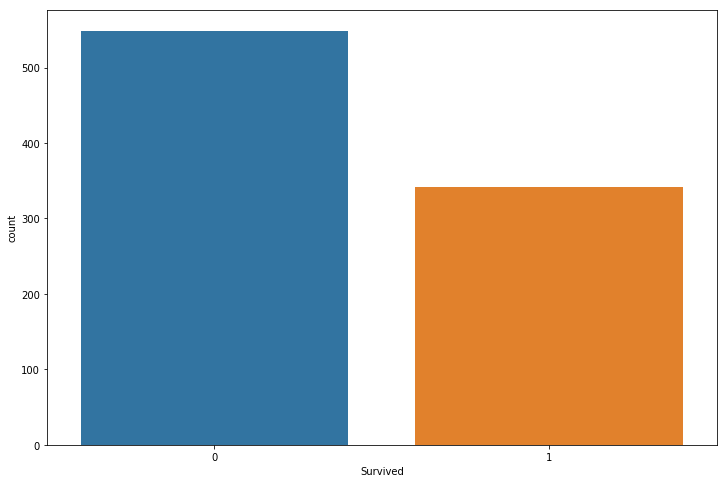

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(titanic['Survived']);
plt.show()

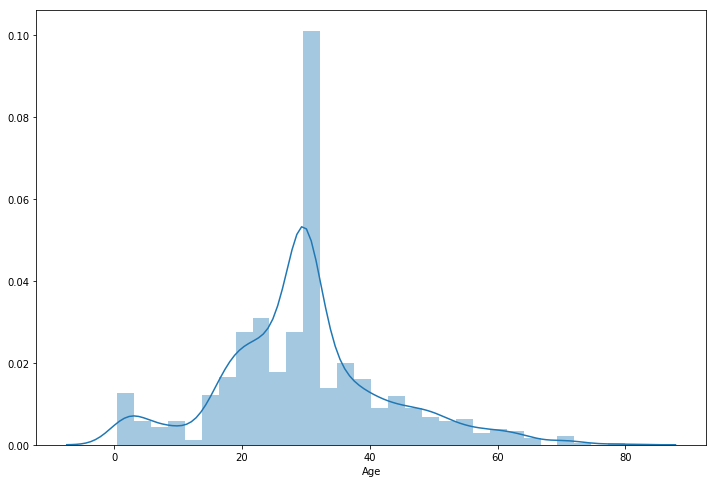

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(titanic['Age'])
plt.show()

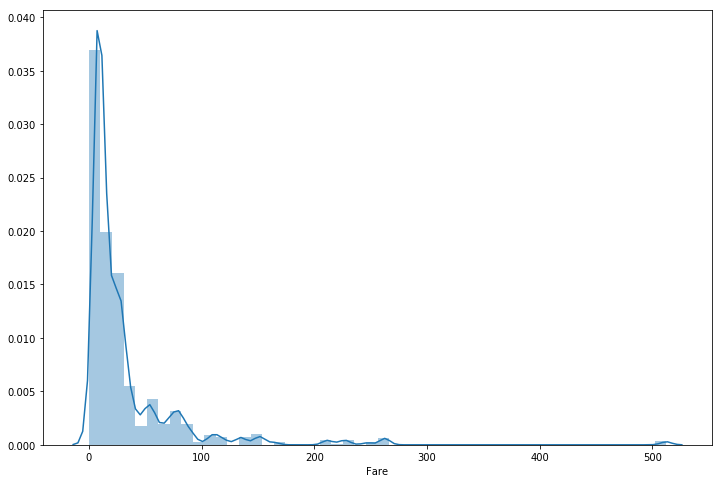

In [59]:
plt.figure(figsize=(12,8))
sns.distplot(titanic['Fare'])
plt.show()

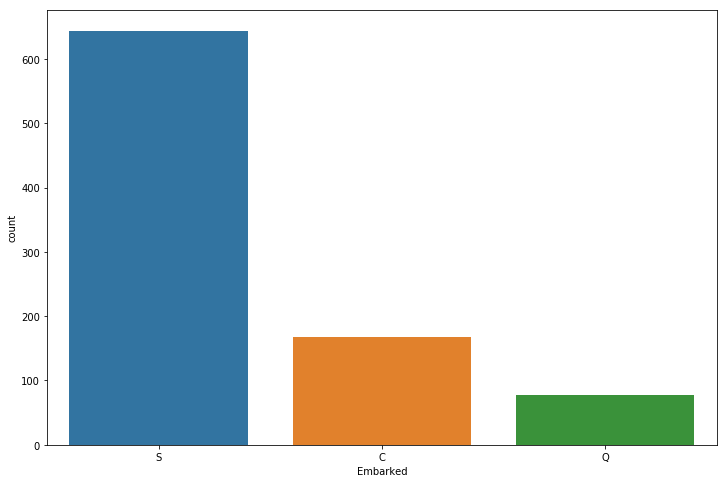

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(titanic['Embarked'])
plt.show()

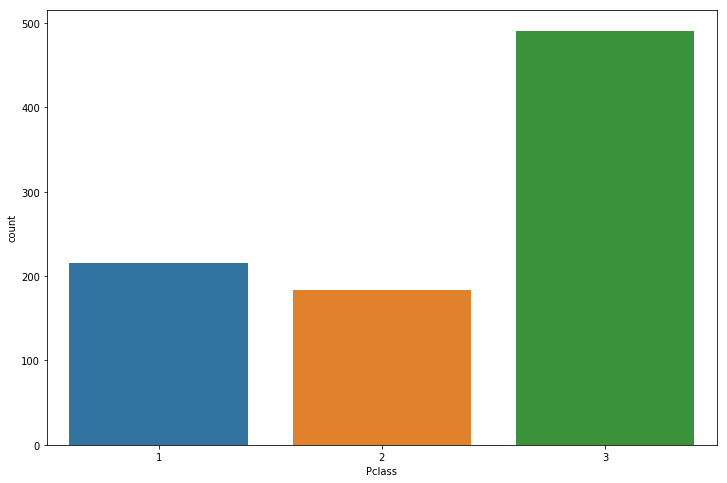

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(titanic['Pclass'])
plt.show()

In [115]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import numpy as np

In [107]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=123,stratify=y, train_size=0.7)

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 199 to 768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    object 
 1   Sex       623 non-null    object 
 2   Age       623 non-null    float64
 3   SibSp     623 non-null    object 
 4   Parch     623 non-null    object 
 5   Fare      623 non-null    float64
 6   Embarked  622 non-null    object 
dtypes: float64(2), object(5)
memory usage: 38.9+ KB


In [92]:
num_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transfomrer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(sparse=False,drop='first'))
])

In [98]:
numeric_columns = list(X_train.select_dtypes(include=['float64','int32','int64']))
categorical_columns = list(X_train.select_dtypes(include=['object']))

In [99]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_tranformer,numeric_columns),
    ('cat',cat_transfomrer,categorical_columns)
], remainder='passthrough')

In [100]:
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

In [101]:
X_train = pipe.fit_transform(X_train)

In [103]:
X_valid = pipe.fit_transform(X_valid)

In [117]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)

y_valid = label_encoder.fit_transform(y_valid)

/Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bhupendrasinhthakre/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [118]:
estimator = KNeighborsClassifier(n_neighbors=3)

In [119]:
estimator.fit(X_train,np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

In [120]:
y_predict = estimator.predict(X_valid)

In [122]:
score = estimator.score(X_valid,y_valid)

In [124]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [125]:
recall_score(y_valid,y_predict)

0.6796116504854369

In [126]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_valid,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.68      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

